<a href="https://colab.research.google.com/github/Falconwatch/SberUni-ChooseMLModel/blob/main/HW_1/Seminar_1_Optuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 1: применение фреймворка Optuna для оптимизации гиперпараметров модели

### Автор: Жолобов Владимир

На этом семинаре рассмотрим популярный фреймворк для оптимизации гиперпараметров Optuna. Вы научитесь применять этот фреймворк для большинства известных библиотек с моделями машинного обучения, а также задавать произвольную целевую функцию для любой задачи.

Установим необходимые библиотеки

In [ ]:
!pip install optuna optuna-dashboard xgboost

In [ ]:
import optuna
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection

## План

1. Постановка задачи
2. Optuna: простой пример
3. Samplers и Pruners
4. Визуализация результатов
5. Optuna: оптимизация гиперпараметров на примере случайного леса и градиентного бустинга
6. Optuna: подбора гиперпараметров простой нейросетевой модели


# 1. Постановка задачи

На лекции Вы рассматривали подходы для автоматизированного машинного обучения (AutoML). Сегодня на семинаре разберем оптимизацию гиперпараметров с помощью фреймворка Optuna.

# 2. Optuna: простой пример

[Optuna](https://optuna.org/)

Рассмотрим простую одномерную задачу оптимизации

$$ \min_{x, y} (x - 2)^2 - y^3 $$

$$s.t. -10 \leq x \leq 10 $$
$$ 100 \leq y \leq 300 $$

In [ ]:
# 1. Задаем целевую функцию
def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    y = trial.suggest_float('y', 100, 300)
    return (x - 2) ** 2 - y ** 3

# 2. Создаем объект обучения
study = optuna.create_study()

# 3. Запускаем оптимизацию
study.optimize(objective, n_trials=100, show_progress_bar=True)

# 4. Выводим лучшее значение параметра
study.best_params  # E.g. {'x': 2.002108042}

[I 2023-07-12 16:29:45,859] A new study created in memory with name: no-name-38e6f02a-4999-4fe9-98db-0cdf35327522


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-07-12 16:29:45,890] Trial 0 finished with value: -7568785.496918142 and parameters: {'x': -4.415882006891625, 'y': 196.34033142146393}. Best is trial 0 with value: -7568785.496918142.
[I 2023-07-12 16:29:45,895] Trial 1 finished with value: -20726036.875971872 and parameters: {'x': -4.587355055083748, 'y': 274.687602362852}. Best is trial 1 with value: -20726036.875971872.
[I 2023-07-12 16:29:45,904] Trial 2 finished with value: -3435005.52623511 and parameters: {'x': 0.11567399281323709, 'y': 150.88380571736528}. Best is trial 1 with value: -20726036.875971872.
[I 2023-07-12 16:29:45,911] Trial 3 finished with value: -19804929.31207517 and parameters: {'x': 6.342463308711864, 'y': 270.5564571771418}. Best is trial 1 with value: -20726036.875971872.
[I 2023-07-12 16:29:45,917] Trial 4 finished with value: -2151913.6487077065 and parameters: {'x': -5.366776993903315, 'y': 129.1056546459076}. Best is trial 1 with value: -20726036.875971872.
[I 2023-07-12 16:29:45,924] Trial 5 fin

{'x': 4.531717277346127, 'y': 299.99045506949136}

Теперь поговорим подробнее про две дополнительные сущности Samplers и Pruning

# 3. Samplers и Pruners

## Samplers

По названию можно понять, что эта сущность связана со способом выбирать параметры из заданного семейства.

Примеры реализованных samplers в Optuna:
- [GridSampler](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.GridSampler.html#optuna.samplers.GridSampler) - Grid Search
- [RandomSearch](https://optuna.readthedocs.io/en/stable/reference/samplers/index.html) - Random Search
- [TPESampler](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.TPESampler.html#optuna.samplers.TPESampler) - Tree-structured Parzen Estimator (default)

Остальные есть [здесь](https://optuna.readthedocs.io/en/stable/reference/samplers/index.html)

Подробнее про то, как они работают, можно прочитать [в соответствующем разделе учебника по ML от Яндекса](https://academy.yandex.ru/handbook/ml/article/podbor-giperparametrov). Мы дальше в курсе подробней разберем этот и другие методы.

Рассмотрим на примере ***GridSampler***

In [ ]:
import optuna
import numpy as np


def objective(trial):
    x = trial.suggest_float("x", -100, 100)
    y = trial.suggest_int("y", -100, 100)
    return x**2 + y**2 + np.exp(-x + 2)


search_space = {"x": [-50, 0, 25, 50], "y": [-99, 0, 99]}
study = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space), )
study.optimize(objective, n_trials=20)

[I 2023-07-12 16:33:38,935] A new study created in memory with name: no-name-7e5ed8b3-ced7-4703-800a-6d5016517d9c
[I 2023-07-12 16:33:38,940] Trial 0 finished with value: 10426.000000000102 and parameters: {'x': 25.0, 'y': 99}. Best is trial 0 with value: 10426.000000000102.
[I 2023-07-12 16:33:38,943] Trial 1 finished with value: 9808.389056098931 and parameters: {'x': 0.0, 'y': 99}. Best is trial 1 with value: 9808.389056098931.
[I 2023-07-12 16:33:38,948] Trial 2 finished with value: 625.0000000001027 and parameters: {'x': 25.0, 'y': 0}. Best is trial 2 with value: 625.0000000001027.
[I 2023-07-12 16:33:38,953] Trial 3 finished with value: 10426.000000000102 and parameters: {'x': 25.0, 'y': -99}. Best is trial 2 with value: 625.0000000001027.
[I 2023-07-12 16:33:38,957] Trial 4 finished with value: 3.831008000716577e+22 and parameters: {'x': -50.0, 'y': 99}. Best is trial 2 with value: 625.0000000001027.
[I 2023-07-12 16:33:38,962] Trial 5 finished with value: 7.38905609893065 and p

## Pruner

Рассмотрим такое понятие как pruner. Pruner --- это механизм раннего прерывания экспериментов, которые с большей долей вероятности приведут к неоптимальным результатам.

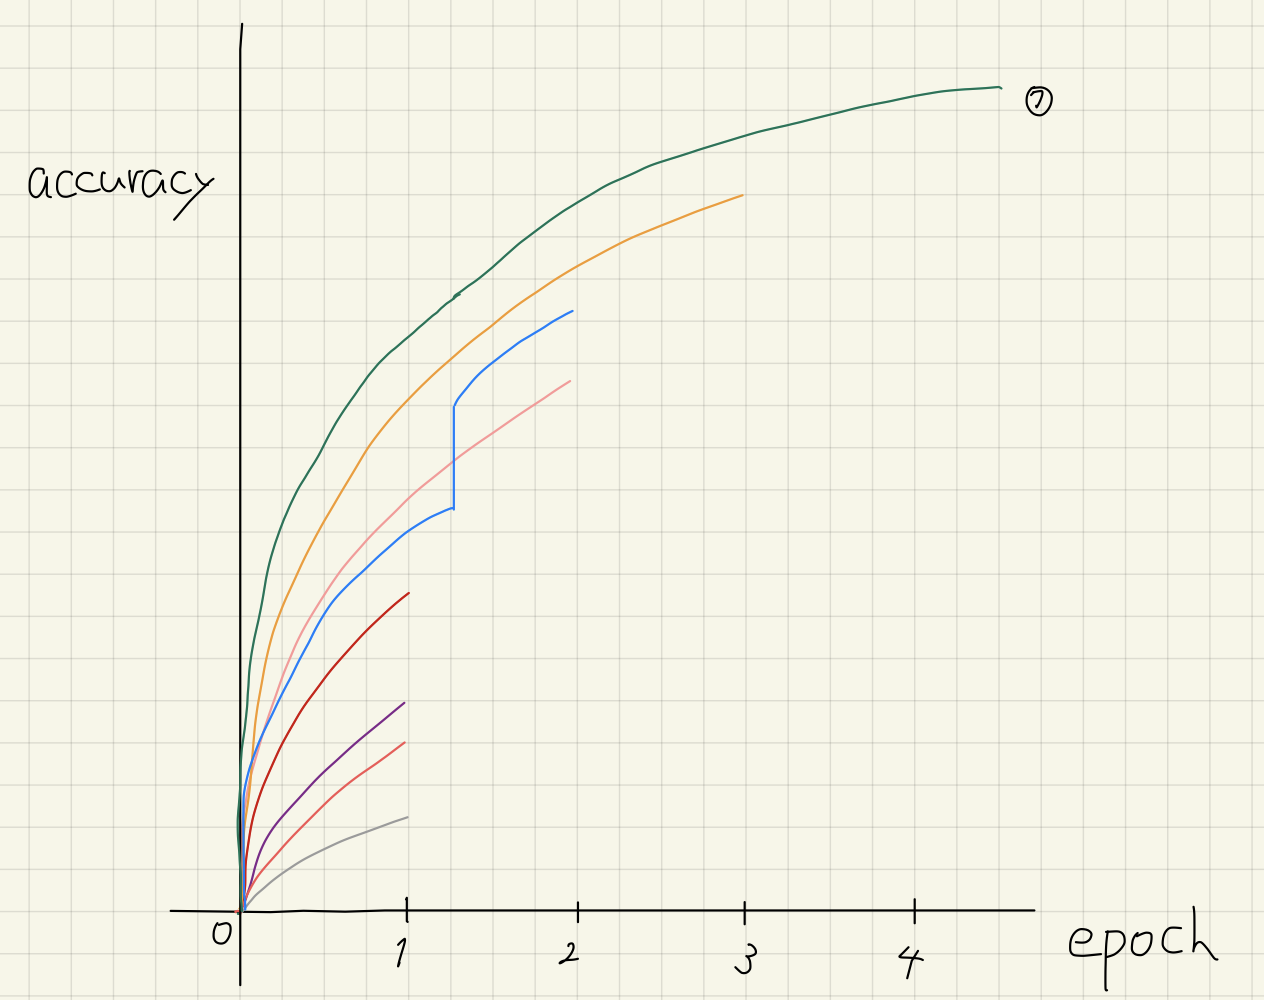

Как видно, эксперимент обрывается после половины эпох.

[Ссылка на изображение](https://habr.com/ru/articles/704432/)

Примеры реализованных pruner в Optuna:
- [MedianPruner](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.MedianPruner.html#optuna.pruners.MedianPruner) - останавливается, если результат в середине эксперимента хуже, чем результат медианы предыдущих запусков на этом шаге;
- [NopPruner](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.NopPruner.html#optuna.pruners.NopPruner) - pruner, который никогда не останавливается;
- [HyperbandPruner](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.HyperbandPruner.html#optuna.pruners.HyperbandPruner) - используется алгоритм [Hyperband](https://arxiv.org/pdf/1603.06560.pdf)
- [ThresholdPruner](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.pruners.ThresholdPruner.html#optuna.pruners.ThresholdPruner) - pruner, который останавливает эксперимент, если значение целевой функции превысило порог.

Рассмотрим на примере ***MedianPruner***

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

import optuna

X, y = load_iris(return_X_y=True)
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
classes = np.unique(y)


def objective(trial):
    alpha = trial.suggest_float("alpha", 0.0, 1.0)
    clf = SGDClassifier(alpha=alpha)
    n_train_iter = 100

    for step in range(n_train_iter):
        clf.partial_fit(X_train, y_train, classes=classes)

        intermediate_value = clf.score(X_valid, y_valid)
        trial.report(intermediate_value, step)

        if trial.should_prune():
            raise optuna.TrialPruned()

    return clf.score(X_valid, y_valid)


study = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=5, n_warmup_steps=30, interval_steps=10
    ),
)
study.optimize(objective, n_trials=20)

[I 2023-07-12 16:35:32,036] A new study created in memory with name: no-name-09634e44-ed1c-4496-9662-155ec6870437
[I 2023-07-12 16:35:32,322] Trial 0 finished with value: 0.631578947368421 and parameters: {'alpha': 0.3305806528423658}. Best is trial 0 with value: 0.631578947368421.
[I 2023-07-12 16:35:32,577] Trial 1 finished with value: 0.631578947368421 and parameters: {'alpha': 0.5575760255720704}. Best is trial 0 with value: 0.631578947368421.
[I 2023-07-12 16:35:32,818] Trial 2 finished with value: 0.631578947368421 and parameters: {'alpha': 0.2265302370805552}. Best is trial 0 with value: 0.631578947368421.
[I 2023-07-12 16:35:33,086] Trial 3 finished with value: 0.631578947368421 and parameters: {'alpha': 0.7408437749414272}. Best is trial 0 with value: 0.631578947368421.
[I 2023-07-12 16:35:33,360] Trial 4 finished with value: 0.631578947368421 and parameters: {'alpha': 0.3153897137855518}. Best is trial 0 with value: 0.631578947368421.
[I 2023-07-12 16:35:33,616] Trial 5 finis

In [ ]:
study.best_params

{'alpha': 0.04241063031655934}

### Результаты можно изображать на графике

Вернемся к предыдущему примеру и попробуем визуализировать результаты. Как видно, в Optuna это делается достаточно просто.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

import optuna

X, y = load_iris(return_X_y=True)
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
classes = np.unique(y)


def objective(trial):
    alpha = trial.suggest_float("alpha", 0.0, 1.0)
    clf = SGDClassifier(alpha=alpha)
    n_train_iter = 100

    for step in range(n_train_iter):
        clf.partial_fit(X_train, y_train, classes=classes)

        intermediate_value = clf.score(X_valid, y_valid)
        trial.report(intermediate_value, step)

        if trial.should_prune():
            raise optuna.TrialPruned()

    return clf.score(X_valid, y_valid)

#optuna.logging.set_verbosity(optuna.logging.WARNING)  # This verbosity change is just to simplify the notebook output.

study = optuna.create_study(
    direction="maximize",
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=5, n_warmup_steps=30, interval_steps=10
    ),
)
study.optimize(objective, n_trials=20, show_progress_bar=True,)

[I 2023-07-12 16:36:40,525] A new study created in memory with name: no-name-a9e27933-359e-47bd-b5a3-621163f6ce56


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2023-07-12 16:36:40,936] Trial 0 finished with value: 0.6842105263157895 and parameters: {'alpha': 0.5426340802452986}. Best is trial 0 with value: 0.6842105263157895.
[I 2023-07-12 16:36:41,352] Trial 1 finished with value: 0.6842105263157895 and parameters: {'alpha': 0.8878755833526523}. Best is trial 0 with value: 0.6842105263157895.
[I 2023-07-12 16:36:41,745] Trial 2 finished with value: 0.6842105263157895 and parameters: {'alpha': 0.25509799878506745}. Best is trial 0 with value: 0.6842105263157895.
[I 2023-07-12 16:36:42,140] Trial 3 finished with value: 0.6842105263157895 and parameters: {'alpha': 0.6794741378629588}. Best is trial 0 with value: 0.6842105263157895.
[I 2023-07-12 16:36:42,562] Trial 4 finished with value: 0.7105263157894737 and parameters: {'alpha': 0.3634256942725582}. Best is trial 4 with value: 0.7105263157894737.
[I 2023-07-12 16:36:42,987] Trial 5 finished with value: 0.6842105263157895 and parameters: {'alpha': 0.5831192896238501}. Best is trial 4 with 

Посмотрим на то, как изменяется функция качества в зависимости от номера эксперимента.

In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [ ]:
from optuna.visualization import plot_intermediate_values

plot_intermediate_values(study)

Можно посмотреть на то, как распределена целевая функция в зависимости от параметров.

In [ ]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)

Еще один способ посмотреть распределение параметров.

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)

Здесь отображаются параметры экспериментов. По вертикальной оси - значение целевой функции. По горизонтальной - значение параметра. Цвет точки темнее там, где более поздний запуск.

# 4. Optuna-dashboard

[Ссылка на репозиторий](https://github.com/optuna/optuna-dashboard)

Для Colab запуск немного сложнее, чем обычно. В репозитории приведен пример простого запуска.

In [ ]:
import time
import threading
from optuna_dashboard import wsgi
import optuna
from wsgiref.simple_server import make_server

def objective(trial):
    x = trial.suggest_float("x", -100, 100)
    y = trial.suggest_categorical("y", [-1, 0, 1])
    return x**2 + y

port = 1238
storage = optuna.storages.InMemoryStorage()
study = optuna.create_study(storage=storage, study_name="dashboard-example")
study.optimize(objective, n_trials=100)


app = wsgi(storage)
httpd = make_server("localhost", port, app)
thread = threading.Thread(target=httpd.serve_forever)
thread.start()
time.sleep(3) # Wait until the server startup

from google.colab import output
output.serve_kernel_port_as_window(port, path='/dashboard/')

[I 2023-07-12 16:39:36,288] A new study created in memory with name: dashboard-example
[I 2023-07-12 16:39:36,313] Trial 0 finished with value: 8104.772461077565 and parameters: {'x': -90.0209556774286, 'y': 1}. Best is trial 0 with value: 8104.772461077565.
[I 2023-07-12 16:39:36,321] Trial 1 finished with value: 5700.079636485518 and parameters: {'x': 75.49224885036554, 'y': 1}. Best is trial 1 with value: 5700.079636485518.
[I 2023-07-12 16:39:36,338] Trial 2 finished with value: 9205.796424586257 and parameters: {'x': -95.94684166029779, 'y': 0}. Best is trial 1 with value: 5700.079636485518.
[I 2023-07-12 16:39:36,341] Trial 3 finished with value: 3551.839008213867 and parameters: {'x': 59.58891682363313, 'y': 1}. Best is trial 3 with value: 3551.839008213867.
[I 2023-07-12 16:39:36,356] Trial 4 finished with value: 216.22781187569322 and parameters: {'x': 14.738650273199823, 'y': -1}. Best is trial 4 with value: 216.22781187569322.
[I 2023-07-12 16:39:36,367] Trial 5 finished wit

<IPython.core.display.Javascript object>

# Optuna: демонстрация оптимизации гиперпараметров на примерах случайного леса и градиентного бустинга

## Случайный лес

In [ ]:
# 1. Задаем целевую функцию для максимизации.
def objective(trial):

    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target

    # 2. Задаем значения для гиперпараметров, используя объект trial.
    classifier_name = trial.suggest_categorical('classifier', ['KNN', 'RandomForest'])
    if classifier_name == 'KNN':
         knn_n = trial.suggest_int('knn_n', 2, 25)
         classifier_obj = sklearn.neighbors.KNeighborsClassifier(n_neighbors=knn_n)
    else:
        rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
        n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
        classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=n_estimators)
    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# 3. Создаем объект study для оптимизации.
study = optuna.create_study(direction='maximize')

# 4. Запускаем оптимизацию целевой функции.
study.optimize(objective, n_trials=100)

[I 2023-07-12 16:45:26,369] A new study created in memory with name: no-name-7790b707-8799-4217-8b50-e7c909016f32
/usr/local/lib/python3.10/dist-packages/optuna/study/_study_summary.py:115: FutureWarning:

`system_attrs` has been deprecated in v3.1.0. The removal of this feature is currently scheduled for v5.0.0, but this schedule is subject to change. See https://github.com/optuna/optuna/releases/tag/v3.1.0.

127.0.0.1 - - [12/Jul/2023 16:45:27] "GET /api/studies/0?after=100 HTTP/1.1" 200 1815
[I 2023-07-12 16:45:29,097] Trial 0 finished with value: 0.9666666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 4, 'n_estimators': 300}. Best is trial 0 with value: 0.9666666666666667.
[I 2023-07-12 16:45:30,880] Trial 1 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 9, 'n_estimators': 297}. Best is trial 0 with value: 0.9666666666666667.
[I 2023-07-12 16:45:30,913] Trial 2 finished with value: 0.96 and parameters: {'classifier

In [ ]:
# 5. Выводим лучшие значения параметров.
study.best_params  # E.g. {'classifier': 'KNN', 'knn_n': 4}

{'classifier': 'KNN', 'knn_n': 4}

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)

Рассмотрим случай градиентного бустинга одной из популярных вариаций -- библиотеки [XGBoost](https://xgboost.readthedocs.io/en/stable/python/index.html)

## Градиентный бустинг

In [ ]:
import numpy as np
import optuna
import time
import threading



import optuna
from optuna_dashboard import wsgi
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
from wsgiref.simple_server import make_server
import xgboost as xgb


def objective(trial):
    (data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # exact для малых выборок.
        "tree_method": "exact",
        # опредяем алгоритм.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear"]),
        # L2 регуляризация.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
    }

    # Максимальная глубина дерева, влияет на сложность по времени.
    param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)


    bst = xgb.train(param, dtrain)
    preds = bst.predict(dvalid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy

port = 1245
storage = optuna.storages.InMemoryStorage()
study = optuna.create_study(storage=storage, direction="maximize", study_name="dashboard-xgboost")
study.optimize(objective, n_trials=100, timeout=600)

app = wsgi(storage)
httpd = make_server("localhost", port, app)
thread = threading.Thread(target=httpd.serve_forever)
thread.start()
time.sleep(3) # Wait until the server startup

from google.colab import output
output.serve_kernel_port_as_window(port, path='/dashboard/')


print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))



[I 2023-07-12 16:47:14,934] A new study created in memory with name: dashboard-xgboost
[I 2023-07-12 16:47:15,960] Trial 0 finished with value: 0.9300699300699301 and parameters: {'booster': 'gbtree', 'lambda': 0.05226639831192266, 'max_depth': 9}. Best is trial 0 with value: 0.9300699300699301.
[I 2023-07-12 16:47:16,198] Trial 1 finished with value: 0.9230769230769231 and parameters: {'booster': 'gblinear', 'lambda': 1.601133070399797e-08, 'max_depth': 5}. Best is trial 0 with value: 0.9300699300699301.
/usr/local/lib/python3.10/dist-packages/optuna/study/_study_summary.py:115: FutureWarning:

`system_attrs` has been deprecated in v3.1.0. The removal of this feature is currently scheduled for v5.0.0, but this schedule is subject to change. See https://github.com/optuna/optuna/releases/tag/v3.1.0.

127.0.0.1 - - [12/Jul/2023 16:47:16] "GET /api/studies/0?after=100 HTTP/1.1" 200 1815
[I 2023-07-12 16:47:17,124] Trial 2 finished with value: 0.9440559440559441 and parameters: {'booster':

<IPython.core.display.Javascript object>

Number of finished trials:  100
Best trial:
  Value: 0.993006993006993
  Params: 
    booster: gbtree
    lambda: 1.6470976273615755e-05
    max_depth: 5


## Использование целевой функции с возможностью подавать параметры

### Выборка Iris

In [ ]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection


class Objective(object):
    def __init__(self, dataset):
        self.dataset = dataset

    def __call__(self, trial):
        x, y = self.dataset.data, self.dataset.target

        # Задаем значения для гиперпараметров, используя объект trial.
        classifier_name = trial.suggest_categorical('classifier', ['KNN', 'RandomForest'])
        if classifier_name == 'KNN':
            knn_n = trial.suggest_int('knn_n', 2, 25)
            classifier_obj = sklearn.neighbors.KNeighborsClassifier(n_neighbors=knn_n)
        else:
            rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
            n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
            classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=n_estimators)

        score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
        accuracy = score.mean()
        return accuracy

# Загрузим выборку для того, чтобы использовать ее в каждом эксперименте.
iris = sklearn.datasets.load_iris()
objective = Objective(iris)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2023-07-12 16:48:58,123] A new study created in memory with name: no-name-2df78208-e19f-49ed-b6b9-1c6f3821caba
[I 2023-07-12 16:48:58,154] Trial 0 finished with value: 0.9666666666666667 and parameters: {'classifier': 'KNN', 'knn_n': 12}. Best is trial 0 with value: 0.9666666666666667.
[I 2023-07-12 16:48:58,949] Trial 1 finished with value: 0.9666666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 20, 'n_estimators': 199}. Best is trial 0 with value: 0.9666666666666667.
[I 2023-07-12 16:48:59,683] Trial 2 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 5, 'n_estimators': 135}. Best is trial 0 with value: 0.9666666666666667.
[I 2023-07-12 16:48:59,714] Trial 3 finished with value: 0.9533333333333333 and parameters: {'classifier': 'KNN', 'knn_n': 19}. Best is trial 0 with value: 0.9666666666666667.
[I 2023-07-12 16:48:59,970] Trial 4 finished with value: 0.9466666666666667 and parameters: {'classifier': 'R

FrozenTrial(number=6, state=TrialState.COMPLETE, values=[0.9866666666666667], datetime_start=datetime.datetime(2023, 7, 12, 16, 49, 3, 639729), datetime_complete=datetime.datetime(2023, 7, 12, 16, 49, 3, 665960), params={'classifier': 'KNN', 'knn_n': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('KNN', 'RandomForest')), 'knn_n': IntDistribution(high=25, log=False, low=2, step=1)}, trial_id=6, value=None)


### Выборка Wine

In [ ]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection


class Objective(object):
    def __init__(self, dataset):
        self.dataset = dataset

    def __call__(self, trial):
        x, y = self.dataset.data, self.dataset.target

        # 2. Задаем значения для гиперпараметров, используя объект trial.
        classifier_name = trial.suggest_categorical('classifier', ['KNN', 'RandomForest'])
        if classifier_name == 'KNN':
            knn_n = trial.suggest_int('knn_n', 2, 25)
            classifier_obj = sklearn.neighbors.KNeighborsClassifier(n_neighbors=knn_n)
        else:
            rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
            n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
            classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=n_estimators)

        score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
        accuracy = score.mean()
        return accuracy

# Загрузим выборку для того, чтобы использовать его на каждом эксперименте.
wine = sklearn.datasets.load_wine()
objective = Objective(wine)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

[I 2023-07-12 16:49:24,994] A new study created in memory with name: no-name-5182fe72-bf8e-45e5-b7db-57d047d6376c
[I 2023-07-12 16:49:25,029] Trial 0 finished with value: 0.6573446327683615 and parameters: {'classifier': 'KNN', 'knn_n': 8}. Best is trial 0 with value: 0.6573446327683615.
[I 2023-07-12 16:49:25,401] Trial 1 finished with value: 0.9383239171374765 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2, 'n_estimators': 91}. Best is trial 1 with value: 0.9383239171374765.
[I 2023-07-12 16:49:25,432] Trial 2 finished with value: 0.6631826741996233 and parameters: {'classifier': 'KNN', 'knn_n': 14}. Best is trial 1 with value: 0.9383239171374765.
[I 2023-07-12 16:49:25,467] Trial 3 finished with value: 0.6631826741996233 and parameters: {'classifier': 'KNN', 'knn_n': 3}. Best is trial 1 with value: 0.9383239171374765.
[I 2023-07-12 16:49:25,546] Trial 4 finished with value: 0.932768361581921 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 13, 'n_esti

FrozenTrial(number=58, state=TrialState.COMPLETE, values=[0.9662900188323916], datetime_start=datetime.datetime(2023, 7, 12, 16, 50, 44, 566285), datetime_complete=datetime.datetime(2023, 7, 12, 16, 50, 45, 189499), params={'classifier': 'RandomForest', 'rf_max_depth': 8, 'n_estimators': 144}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('KNN', 'RandomForest')), 'rf_max_depth': IntDistribution(high=32, log=True, low=2, step=1), 'n_estimators': IntDistribution(high=1000, log=True, low=10, step=1)}, trial_id=58, value=None)


## Задание значений вручную

In [ ]:
import sklearn.datasets
import sklearn.model_selection


def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target

    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
    classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=n_estimators)

    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy



study = optuna.create_study(direction="maximize")

# Задаем конкретные значение параметров для проверки их.
study.enqueue_trial({"rf_max_depth": 1})
study.enqueue_trial({"rf_max_depth": 10})

study.optimize(objective, n_trials=100)

print("C={}, Value={}".format(study.trials[0].params["rf_max_depth"], study.trials[0].value))
print("C={}, Value={}".format(study.trials[1].params["rf_max_depth"], study.trials[1].value))
print("C={}, Value={}".format(study.best_trial.params["rf_max_depth"], study.best_trial.value))

[I 2023-07-12 15:33:00,011] A new study created in memory with name: no-name-1001a8da-2f94-4a36-9601-b3c0b58b8995
/usr/local/lib/python3.10/dist-packages/optuna/trial/_trial.py:651: UserWarning:

Fixed parameter 'rf_max_depth' with value 1 is out of range for distribution IntDistribution(high=32, log=True, low=2, step=1).

[I 2023-07-12 15:33:00,852] Trial 0 finished with value: 0.9466666666666667 and parameters: {'rf_max_depth': 1, 'n_estimators': 111}. Best is trial 0 with value: 0.9466666666666667.
[I 2023-07-12 15:33:01,171] Trial 1 finished with value: 0.9533333333333333 and parameters: {'rf_max_depth': 10, 'n_estimators': 37}. Best is trial 1 with value: 0.9533333333333333.
[I 2023-07-12 15:33:02,577] Trial 2 finished with value: 0.9666666666666667 and parameters: {'rf_max_depth': 10, 'n_estimators': 288}. Best is trial 2 with value: 0.9666666666666667.
[I 2023-07-12 15:33:02,950] Trial 3 finished with value: 0.9666666666666667 and parameters: {'rf_max_depth': 6, 'n_estimators': 

C=1, Value=0.9466666666666667
C=10, Value=0.9533333333333333
C=10, Value=0.9666666666666667


# Optuna: демонстрация подбора параметров нейросетевой модели

---



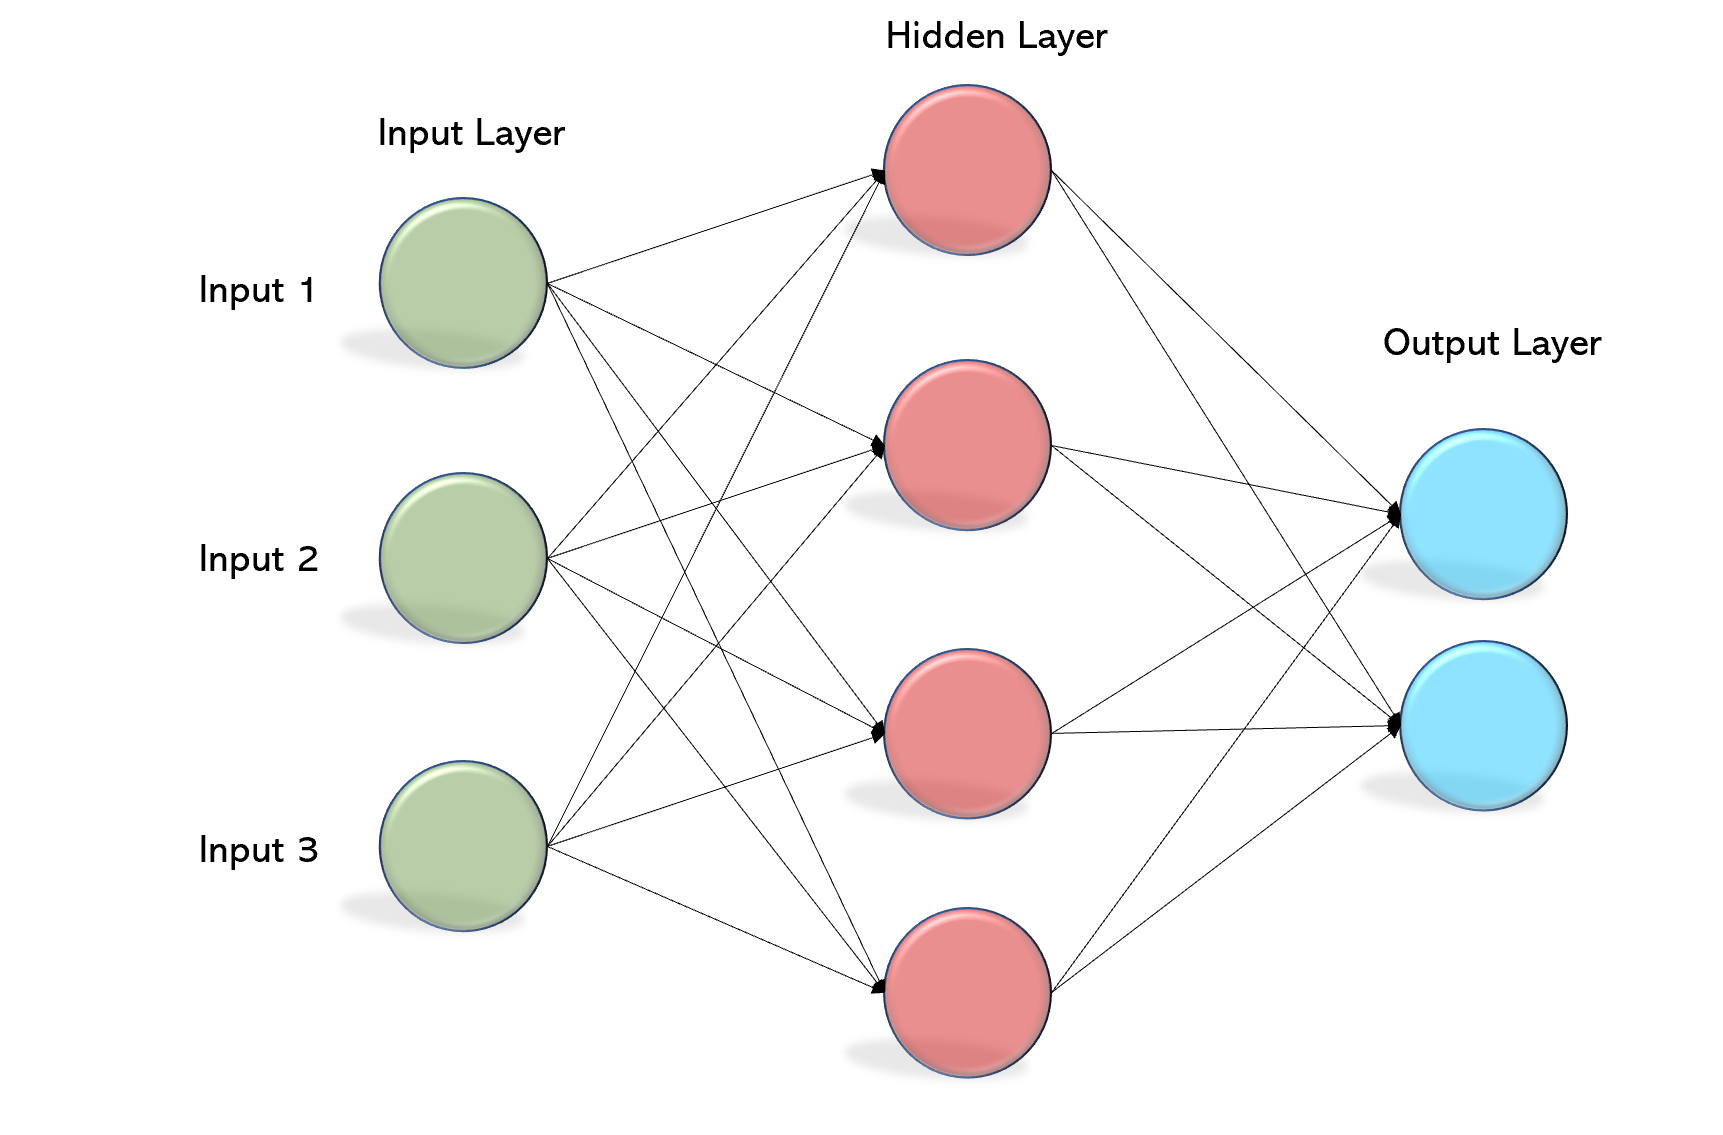


[Ссылка на изображение](https://machinelearningmastery.ru/recommendation-system-series-part-2-the-10-categories-of-deep-recommendation-systems-that-189d60287b58/)

Подробнее про библиотеку [Pytorch](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np
import optuna
from optuna.trial import TrialState
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
import torchvision
from torchvision import datasets
from torchvision import transforms

In [ ]:
DEVICE = torch.device("cpu")
BATCHSIZE = 128
CLASSES = 10
DIR = os.getcwd()
EPOCHS = 10
N_TRAIN_EXAMPLES = BATCHSIZE * 30
N_VALID_EXAMPLES = BATCHSIZE * 10

In [ ]:
def define_model(trial):
    # We optimize the number of layers, hidden units and dropout ratio in each layer.
    n_layers = trial.suggest_int("n_layers", 1, 3)
    layers = []

    in_features = 28 * 28
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features
    layers.append(nn.Linear(in_features, CLASSES))
    layers.append(nn.LogSoftmax(dim=1))

    return nn.Sequential(*layers)

In [ ]:
def get_fashion_mnist():
    # Load FashionMNIST dataset.
    train_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(DIR, train=True, download=True, transform=transforms.ToTensor()),
        batch_size=BATCHSIZE,
        shuffle=True,
    )
    valid_loader = torch.utils.data.DataLoader(
        datasets.FashionMNIST(DIR, train=False, transform=transforms.ToTensor()),
        batch_size=BATCHSIZE,
        shuffle=True,
    )

    return train_loader, valid_loader

### Пример изображений

In [ ]:
loader, _ = get_fashion_mnist()

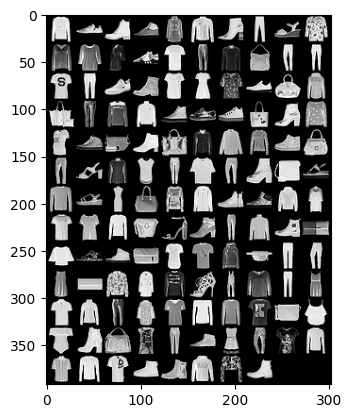

In [ ]:
x, y = next(iter(loader))
grid_img = torchvision.utils.make_grid(x, nrow=10)
plt.imshow(grid_img.permute(1, 2, 0))


Здесь изображено 128 картинок.

### Оптимизация гиперпараметров

In [ ]:
def objective(trial):
    # Сгенерируем модель.
    model = define_model(trial).to(DEVICE)

    # Сгенерируем оптимизатор.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    # Получим обучающую и валидационную выборки.
    train_loader, valid_loader = get_fashion_mnist()

    # Обучаем модель.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Ограничим рассматриваемую выборку для быстроты.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            loss = F.nll_loss(output, target)
            loss.backward()
            optimizer.step()

        # Валидируем модель.
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(valid_loader):
                # Ограничим рассматриваемую выборку для быстроты.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Получим индекс наиболее вероятных классов.
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / min(len(valid_loader.dataset), N_VALID_EXAMPLES)

        trial.report(accuracy, epoch)

        # Применим прунинг, если он необходим.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-07-12 17:00:04,561] A new study created in memory with name: no-name-15f0d8d8-9a31-4b78-b4a1-7dd999dcc06c
/usr/local/lib/python3.10/dist-packages/optuna/study/_study_summary.py:115: FutureWarning:

`system_attrs` has been deprecated in v3.1.0. The removal of this feature is currently scheduled for v5.0.0, but this schedule is subject to change. See https://github.com/optuna/optuna/releases/tag/v3.1.0.

127.0.0.1 - - [12/Jul/2023 17:00:04] "GET /api/studies/0?after=100 HTTP/1.1" 200 2100
[I 2023-07-12 17:00:05,726] Trial 0 finished with value: 0.6631826741996233 and parameters: {'classifier': 'KNN', 'knn_n': 13}. Best is trial 0 with value: 0.6631826741996233.
[I 2023-07-12 17:00:05,816] Trial 1 finished with value: 0.9384180790960452 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 7, 'n_estimators': 10}. Best is trial 1 with value: 0.9384180790960452.
[I 2023-07-12 17:00:05,846] Trial 2 finished with value: 0.6631826741996233 and parameters: {'classifier': 'KNN',

Study statistics: 
  Number of finished trials:  100
  Number of pruned trials:  0
  Number of complete trials:  100
Best trial:
  Value:  0.9662900188323916
  Params: 
    classifier: RandomForest
    rf_max_depth: 7
    n_estimators: 65


In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)

# Выводы

- Optuna достаточно простой инструмент для настройки гиперпараметров модели.
- Реализовано множество методов сэмплирования, не надо применять GridSearch.
- Можно применять к любой известной библиотеке для машинного обучения (от простого sklearn до сложных нейросетевых моделей pytorch).
- Наличие dashboard позволяет собирать все результаты вместе и рисовать необходимые графики.
- ***PS***: для [Hydra](https://hydra.cc/) есть [Optuna plugin](https://hydra.cc/docs/plugins/optuna_sweeper/):)
